## Improving the Linear Model

***

## Attribute Information:

- Date : year-month-day
- Rented Bike count - Count of bikes rented at each hour
- Hour - Hour of he day
- Temperature-Temperature in Celsius
- Humidity - %
- Windspeed - m/s
- Visibility - 10m
- Dew point temperature - Celsius
- Solar radiation - MJ/m2
- Rainfall - mm
- Snowfall - cm
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import sklearn

import shap
import statsmodels.api as sm

import datetime
from datetime import datetime, timedelta

import scipy.stats



from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')


from pycaret.regression import *

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("seoulbikesharingclean.csv",parse_dates=['date'])

In [3]:
df

,date,bikecounts,hour,temp,humidity,windspeed,visibility,dewpointtemp,solarradiation,rainfall,snowfall,spring,summer,winter,noholiday,functioningday
0,2017-01-12,254.00,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,0,0,1,1,1
1,2017-01-12,204.00,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,0,0,1,1,1
2,2017-01-12,173.00,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,0,0,1,1,1
3,2017-01-12,107.00,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,0,0,1,1,1
4,2017-01-12,78.00,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003.00,19,4.20,34,2.60,1894,-10.30,0.00,0.00,0.00,0,0,0,1,1
8756,2018-11-30,764.00,20,3.40,37,2.30,2000,-9.90,0.00,0.00,0.00,0,0,0,1,1
8757,2018-11-30,694.00,21,2.60,39,0.30,1968,-9.90,0.00,0.00,0.00,0,0,0,1,1
8758,2018-11-30,712.00,22,2.10,41,1.00,1859,-9.80,0.00,0.00,0.00,0,0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            8760 non-null   datetime64[ns]
 1   bikecounts      8760 non-null   float64       
 2   hour            8760 non-null   int64         
 3   temp            8760 non-null   float64       
 4   humidity        8760 non-null   int64         
 5   windspeed       8760 non-null   float64       
 6   visibility      8760 non-null   int64         
 7   dewpointtemp    8760 non-null   float64       
 8   solarradiation  8760 non-null   float64       
 9   rainfall        8760 non-null   float64       
 10  snowfall        8760 non-null   float64       
 11  spring          8760 non-null   int64         
 12  summer          8760 non-null   int64         
 13  winter          8760 non-null   int64         
 14  noholiday       8760 non-null   int64         
 15  func

In [5]:
df.describe(include='all')

,date,bikecounts,hour,temp,humidity,windspeed,visibility,dewpointtemp,solarradiation,rainfall,snowfall,spring,summer,winter,noholiday,functioningday
count,8760,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00
unique,365,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,2018-05-21 00:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,24,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
first,2017-01-12 00:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
last,2018-12-11 00:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,722.85,11.50,12.87,58.23,1.72,1436.83,4.07,0.57,0.15,0.08,0.25,0.25,0.25,0.95,0.97
std,NaN,632.34,6.92,11.94,20.36,1.04,608.30,13.06,0.87,1.13,0.44,0.43,0.43,0.43,0.22,0.18
min,NaN,2.00,0.00,-17.80,0.00,0.00,27.00,-30.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,NaN,221.00,5.75,3.50,42.00,0.90,940.00,-4.70,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00


In [6]:
df.shape

(8760, 16)

In [7]:
df.columns

Index(['date', 'bikecounts', 'hour', 'temp', 'humidity', 'windspeed', 'visibility', 'dewpointtemp', 'solarradiation', 'rainfall', 'snowfall', 'spring', 'summer', 'winter', 'noholiday', 'functioningday'], dtype='object')

In [8]:
df['hour'] = df['hour'].astype("category")

In [9]:
df = df[['hour', 'temp', 'humidity', 'windspeed', 'visibility', 'dewpointtemp', 'solarradiation', 'rainfall', 'snowfall', 'spring', 
         'summer', 'winter', 'noholiday', 'functioningday', 'bikecounts']]

In [10]:
df.head()

,hour,temp,humidity,windspeed,visibility,dewpointtemp,solarradiation,rainfall,snowfall,spring,summer,winter,noholiday,functioningday,bikecounts
0,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,0,0,1,1,1,254.00
1,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,0,0,1,1,1,204.00
2,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,0,0,1,1,1,173.00
3,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,0,0,1,1,1,107.00
4,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,0,0,1,1,1,78.00


In [11]:
df.shape

(8760, 15)

### Train Test Split

In [12]:
X = df.iloc[:,0:14]
y = df.iloc[:,14]

In [13]:
X.values, y.values

(array([[ 0. , -5.2, 37. , ...,  1. ,  1. ,  1. ],
        [ 1. , -5.5, 38. , ...,  1. ,  1. ,  1. ],
        [ 2. , -6. , 39. , ...,  1. ,  1. ,  1. ],
        ...,
        [21. ,  2.6, 39. , ...,  0. ,  1. ,  1. ],
        [22. ,  2.1, 41. , ...,  0. ,  1. ,  1. ],
        [23. ,  1.9, 43. , ...,  0. ,  1. ,  1. ]]),
 array([254., 204., 173., ..., 694., 712., 584.]))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7008, 14), (1752, 14), (7008,), (1752,))

### Feature Scaling

In [16]:
X_train

,hour,temp,humidity,windspeed,visibility,dewpointtemp,solarradiation,rainfall,snowfall,spring,summer,winter,noholiday,functioningday
2031,15,8.20,62,0.60,291,1.30,1.22,0.00,0.00,0,0,1,1,1
6570,18,28.40,57,2.40,2000,19.00,0.84,0.00,0.00,0,1,0,1,1
6371,11,29.90,57,1.70,1992,20.40,0.88,0.10,0.00,0,1,0,1,1
3490,10,14.80,29,0.60,1749,-3.00,2.20,0.00,0.00,1,0,0,1,1
7700,20,12.20,47,1.10,2000,1.20,0.00,0.00,0.00,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,5,17.80,75,1.00,1210,13.30,0.00,0.00,0.00,0,1,0,1,1
7891,19,16.40,47,1.00,1694,5.00,0.00,0.00,0.00,0,0,0,1,1
4859,11,25.50,57,1.80,943,16.30,3.01,0.00,0.00,0,1,0,1,1
3264,0,8.30,59,2.10,1912,0.70,0.00,0.00,0.00,1,0,0,1,1


In [17]:
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)

In [19]:
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled

array([[ 0.50774916, -0.38777801,  0.18996015, ...,  1.7507042 ,
         0.23202281,  0.18254726],
       [ 0.9408263 ,  1.30056586, -0.05608294, ..., -0.57119872,
         0.23202281,  0.18254726],
       [-0.06968702,  1.42593793, -0.05608294, ..., -0.57119872,
         0.23202281,  0.18254726],
       ...,
       [-0.06968702,  1.05817986, -0.05608294, ..., -0.57119872,
         0.23202281,  0.18254726],
       [-1.65763652, -0.37941987,  0.0423343 , ..., -0.57119872,
         0.23202281,  0.18254726],
       [ 1.22954439, -0.47971752,  1.22334111, ..., -0.57119872,
         0.23202281,  0.18254726]])

In [21]:
X_test_scaled

array([[-1.22455939, -0.17882456,  0.73125494, ..., -0.57119872,
         0.23202281,  0.18254726],
       [-1.36891843,  0.74057062,  0.97729803, ..., -0.57119872,
         0.23202281,  0.18254726],
       [ 0.79646725, -0.77225235,  0.337586  , ...,  1.7507042 ,
         0.23202281,  0.18254726],
       ...,
       [-1.65763652, -0.2540478 ,  1.37096697, ..., -0.57119872,
         0.23202281,  0.18254726],
       [ 1.51826248, -0.04509435,  0.337586  , ..., -0.57119872,
         0.23202281,  0.18254726],
       [-1.65763652, -0.21225711,  0.43600324, ..., -0.57119872,
         0.23202281,  0.18254726]])

### Model Training

### Using PyCaret

In [22]:
exp_reg = setup(data = df, target = 'bikecounts', session_id=0, normalize=True, train_size = 0.8) 

,Description,Value
0,session_id,0
1,Target,bikecounts
2,Original Data,"(8760, 15)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7008, 37)"


In [23]:
compare_models(exclude=['omp','br','ard','par','ransac','tr','huber','kr','svm','knn','dt','rf',
                        'et','ada','gbr','mlp','xgboost','lightgbm','catboost'],fold=5) # For Regressor

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,283.0143,142660.9000,377.6294,0.6422,0.8924,1.5912,1.1580
ridge,Ridge Regression,282.9418,142645.2344,377.6091,0.6422,0.8941,1.5886,0.0140
lar,Least Angle Regression,283.0429,142767.5492,377.7662,0.6420,0.8922,1.5900,0.0160
lasso,Lasso Regression,283.3254,143644.9844,378.9253,0.6398,0.8928,1.5563,0.0400
llar,Lasso Least Angle Regression,354.6801,227398.6736,476.6986,0.4301,0.9387,1.9962,0.0160
en,Elastic Net,359.0337,235343.4406,484.8899,0.4107,0.9293,1.7635,0.0160


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

## Using Regression Models

### Linear Regression

In [24]:
lr_model = LinearRegression()

In [25]:
lr_model.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
lr_pred = lr_model.predict(X_test_scaled)

In [27]:
lr_pred

array([ 422.10429224,  762.75387078,  508.16958107, ...,  195.24018331,
       1188.73330772,  511.1499393 ])

### LR Model Evaluation

In [28]:
mse = mean_squared_error(y_test,lr_pred)
mse

190932.63937424964

In [29]:
rmse = np.sqrt(mse)
rmse

436.95839547289813

In [30]:
r2score = r2_score(y_test,lr_pred)
r2score

0.5230221500665885

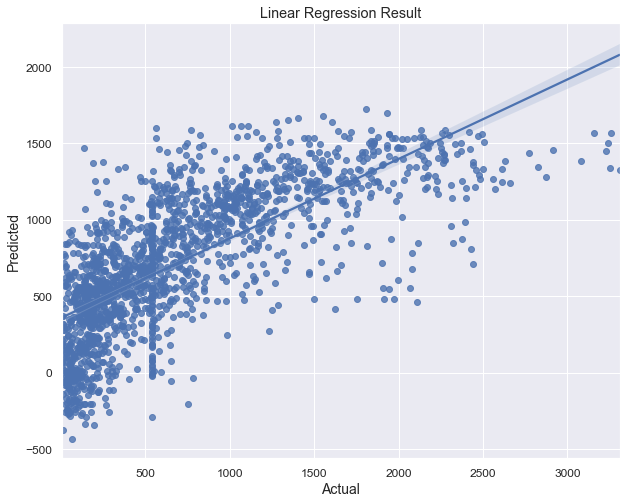

In [31]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=lr_pred, ax=ax)
plt.title("Linear Regression Result")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

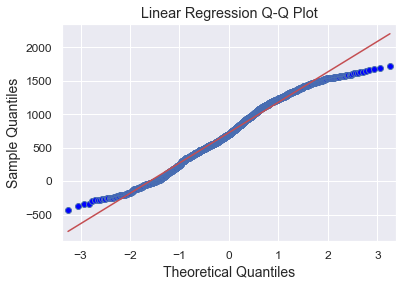

In [32]:
sm.qqplot(lr_pred, line='s')
plt.title("Linear Regression Q-Q Plot")
plt.show()

### Ridge Regression

In [33]:
ridge_model = Ridge(alpha=3.0,random_state=0)

In [34]:
ridge_model.fit(X_train_scaled,y_train)

Ridge(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

In [35]:
ridge_pred = ridge_model.predict(X_test_scaled)

In [36]:
ridge_pred

array([ 422.44397436,  762.7344834 ,  507.54602265, ...,  196.72273903,
       1188.27682835,  511.00800608])

### Ridge Model Evaluation

In [37]:
mse = mean_squared_error(y_test,ridge_pred)
mse

190908.66060324243

In [38]:
rmse = np.sqrt(mse)
rmse

436.9309563343417

In [39]:
r2score = r2_score(y_test,ridge_pred)
r2score

0.5230820525676828

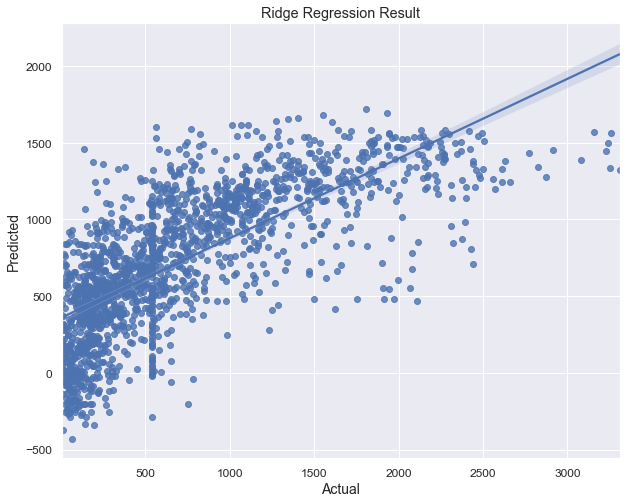

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=ridge_pred, ax=ax)
plt.title("Ridge Regression Result")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

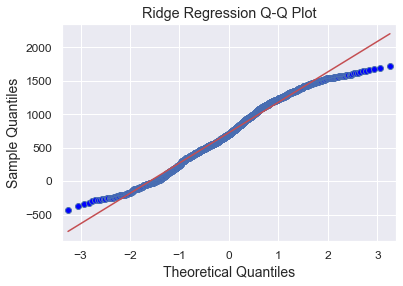

In [41]:
sm.qqplot(ridge_pred, line='s')
plt.title("Ridge Regression Q-Q Plot")
plt.show()

### Lasso Regression

In [42]:
lasso_model = Lasso(alpha=3.0,random_state=0)

In [43]:
lasso_model.fit(X_train_scaled,y_train)

Lasso(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [44]:
lasso_pred = lasso_model.predict(X_test_scaled)

In [45]:
lasso_pred

array([ 429.33518238,  734.58312569,  480.99955972, ...,  222.06418586,
       1164.38606023,  491.27142303])

### Lasso Model Evaluation

In [46]:
mse = mean_squared_error(y_test,lasso_pred)
mse

191591.36581065372

In [47]:
rmse = np.sqrt(mse)
rmse

437.7115097991527

In [48]:
r2score = r2_score(y_test,lasso_pred)
r2score

0.5213765544242717

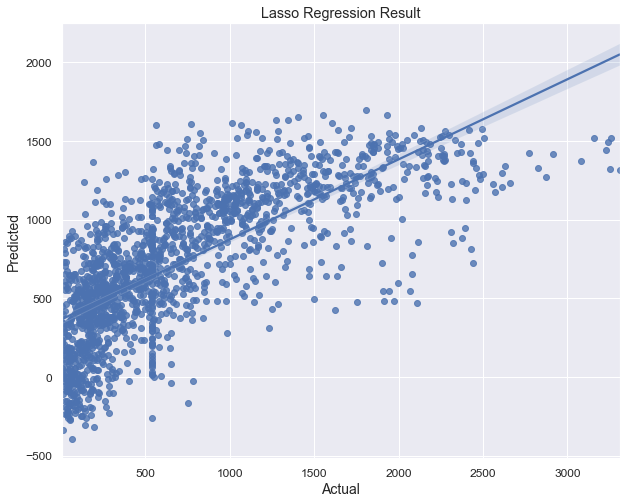

In [49]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=lasso_pred, ax=ax)
plt.title("Lasso Regression Result")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

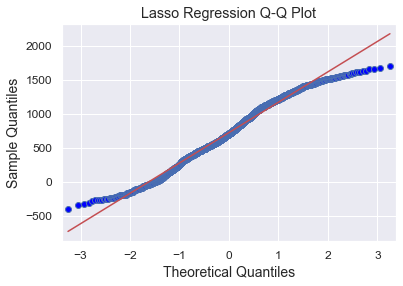

In [50]:
sm.qqplot(lasso_pred, line='s')
plt.title("Lasso Regression Q-Q Plot")
plt.show()

In [51]:
lasso_model.coef_

array([ 190.97227118,  216.41593571, -185.09524863,   14.39165877,
         12.89325847,   88.08740377,  -54.48474236,  -62.81980956,
          6.82564459,  -45.63024606,  -41.8869398 , -152.43228066,
         21.83415864,   62.42481968])

In [52]:
pd.Series(lasso_model.coef_, X.columns)

hour              190.97
temp              216.42
humidity         -185.10
windspeed          14.39
visibility         12.89
dewpointtemp       88.09
solarradiation    -54.48
rainfall          -62.82
snowfall            6.83
spring            -45.63
summer            -41.89
winter           -152.43
noholiday          21.83
functioningday     62.42
dtype: float64

### Elastic Net

In [53]:
elastic_model = ElasticNet(alpha=3.0, random_state=0)

In [54]:
elastic_model.fit(X_train_scaled,y_train)

ElasticNet(alpha=3.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
elastic_pred = elastic_model.predict(X_test_scaled)

In [56]:
elastic_pred

array([616.66110701, 716.57823262, 550.89407923, ..., 546.12045143,
       904.08720282, 587.26695543])

### Elastic Net Model Evaluation

In [57]:
mse = mean_squared_error(y_test,elastic_pred)
mse

245844.82580422054

In [58]:
rmse = np.sqrt(mse)
rmse

495.8274153414881

In [59]:
r2score = r2_score(y_test,elastic_pred)
r2score

0.3858434219855761

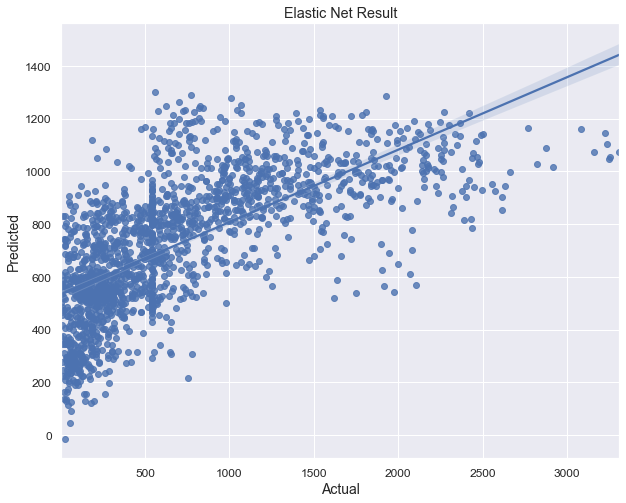

In [60]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=elastic_pred, ax=ax)
plt.title("Elastic Net Result")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

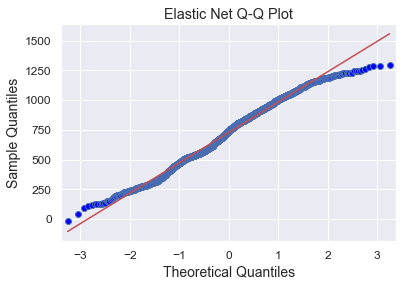

In [61]:
sm.qqplot(elastic_pred, line='s')
plt.title("Elastic Net Q-Q Plot")
plt.show()

In [62]:
elastic_model.coef_

array([ 90.82517183,  86.11936113, -48.52443738,  17.19566286,
        35.64801735,  54.94419568,  26.90153941, -29.8254016 ,
       -14.17115131,  -0.8333387 ,  27.511733  , -71.89996147,
        11.41109534,  17.23448411])

In [63]:
pd.Series(elastic_model.coef_, X.columns)

hour              90.83
temp              86.12
humidity         -48.52
windspeed         17.20
visibility        35.65
dewpointtemp      54.94
solarradiation    26.90
rainfall         -29.83
snowfall         -14.17
spring            -0.83
summer            27.51
winter           -71.90
noholiday         11.41
functioningday    17.23
dtype: float64

### Polynomial Regression

In [64]:
polynomial = PolynomialFeatures(degree=2)

### Train Test Split

In [65]:
X = df.iloc[:,0:14]
y = df.iloc[:,14]

In [66]:
X.values, y.values

(array([[ 0. , -5.2, 37. , ...,  1. ,  1. ,  1. ],
        [ 1. , -5.5, 38. , ...,  1. ,  1. ,  1. ],
        [ 2. , -6. , 39. , ...,  1. ,  1. ,  1. ],
        ...,
        [21. ,  2.6, 39. , ...,  0. ,  1. ,  1. ],
        [22. ,  2.1, 41. , ...,  0. ,  1. ,  1. ],
        [23. ,  1.9, 43. , ...,  0. ,  1. ,  1. ]]),
 array([254., 204., 173., ..., 694., 712., 584.]))

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7008, 14), (1752, 14), (7008,), (1752,))

In [69]:
X_train = polynomial.fit_transform(X_train)

In [70]:
X_test = polynomial.fit_transform(X_test)

In [71]:
X_train

array([[ 1. , 15. ,  8.2, ...,  1. ,  1. ,  1. ],
       [ 1. , 18. , 28.4, ...,  1. ,  1. ,  1. ],
       [ 1. , 11. , 29.9, ...,  1. ,  1. ,  1. ],
       ...,
       [ 1. , 11. , 25.5, ...,  1. ,  1. ,  1. ],
       [ 1. ,  0. ,  8.3, ...,  1. ,  1. ,  1. ],
       [ 1. , 20. ,  7.1, ...,  1. ,  1. ,  1. ]])

In [72]:
X_test

array([[ 1. ,  3. , 10.7, ...,  1. ,  1. ,  1. ],
       [ 1. ,  2. , 21.7, ...,  1. ,  1. ,  1. ],
       [ 1. , 17. ,  3.6, ...,  1. ,  1. ,  1. ],
       ...,
       [ 1. ,  0. ,  9.8, ...,  1. ,  1. ,  1. ],
       [ 1. , 22. , 12.3, ...,  1. ,  1. ,  1. ],
       [ 1. ,  0. , 10.3, ...,  1. ,  1. ,  1. ]])

In [73]:
X_train.shape

(7008, 120)

### Feature Scaling

In [74]:
X_train

array([[ 1. , 15. ,  8.2, ...,  1. ,  1. ,  1. ],
       [ 1. , 18. , 28.4, ...,  1. ,  1. ,  1. ],
       [ 1. , 11. , 29.9, ...,  1. ,  1. ,  1. ],
       ...,
       [ 1. , 11. , 25.5, ...,  1. ,  1. ,  1. ],
       [ 1. ,  0. ,  8.3, ...,  1. ,  1. ,  1. ],
       [ 1. , 20. ,  7.1, ...,  1. ,  1. ,  1. ]])

In [75]:
scaler = StandardScaler()

In [76]:
X_train_scaled = scaler.fit_transform(X_train)

In [77]:
X_test_scaled = scaler.transform(X_test)

In [78]:
X_train_scaled

array([[ 0.        ,  0.50774916, -0.38777801, ...,  0.23202281,
         0.29584333,  0.18254726],
       [ 0.        ,  0.9408263 ,  1.30056586, ...,  0.23202281,
         0.29584333,  0.18254726],
       [ 0.        , -0.06968702,  1.42593793, ...,  0.23202281,
         0.29584333,  0.18254726],
       ...,
       [ 0.        , -0.06968702,  1.05817986, ...,  0.23202281,
         0.29584333,  0.18254726],
       [ 0.        , -1.65763652, -0.37941987, ...,  0.23202281,
         0.29584333,  0.18254726],
       [ 0.        ,  1.22954439, -0.47971752, ...,  0.23202281,
         0.29584333,  0.18254726]])

In [79]:
X_test_scaled

array([[ 0.        , -1.22455939, -0.17882456, ...,  0.23202281,
         0.29584333,  0.18254726],
       [ 0.        , -1.36891843,  0.74057062, ...,  0.23202281,
         0.29584333,  0.18254726],
       [ 0.        ,  0.79646725, -0.77225235, ...,  0.23202281,
         0.29584333,  0.18254726],
       ...,
       [ 0.        , -1.65763652, -0.2540478 , ...,  0.23202281,
         0.29584333,  0.18254726],
       [ 0.        ,  1.51826248, -0.04509435, ...,  0.23202281,
         0.29584333,  0.18254726],
       [ 0.        , -1.65763652, -0.21225711, ...,  0.23202281,
         0.29584333,  0.18254726]])

In [80]:
poly_model = LinearRegression()

In [81]:
poly_model.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
poly_pred = poly_model.predict(X_test_scaled)

In [83]:
poly_pred

array([ 436.81057363,  584.59182363,  311.98342519, ...,  270.17776113,
       1216.93166738,  445.88479238])

### Polynomial Model Evaluation

In [84]:
mse = mean_squared_error(y_test,poly_pred)
mse

341431.42682598974

In [85]:
rmse = np.sqrt(mse)
rmse

584.3213386707606

In [86]:
r2score = r2_score(y_test,poly_pred)
r2score

0.14705401653227668

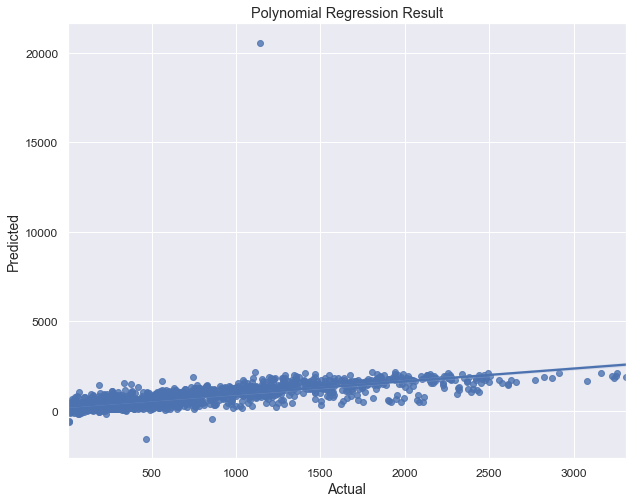

In [87]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=poly_pred, ax=ax)
plt.title("Polynomial Regression Result")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

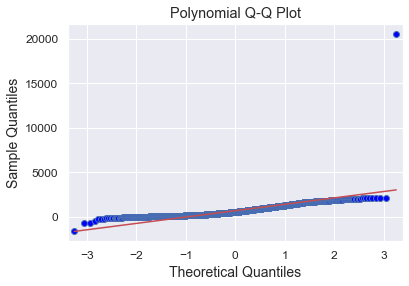

In [88]:
sm.qqplot(poly_pred, line='s')
plt.title("Polynomial Q-Q Plot")
plt.show()

In [89]:
poly_model.coef_

array([ 4.99330794e-13,  2.53985900e+02,  1.09928198e+02,  5.56780882e+02,
        2.51953150e+02, -4.36132262e+02, -2.92161549e+02, -6.66720114e+02,
        7.49080021e+03, -1.75073494e+13,  1.15017268e+13,  9.48791832e+12,
       -6.24071014e+12, -2.69713635e+13, -5.41618108e+12, -5.06875047e+01,
        3.21472801e+01, -3.93646871e+02,  2.36211303e+01,  1.19065823e+01,
        2.69913084e+02,  1.52354736e+02, -3.64320952e+01,  2.08546080e+01,
       -3.91580761e+01,  1.72485930e+01, -4.17008206e+01,  6.55234881e+01,
        2.46624613e+02, -3.26469327e+02, -1.04410350e+02,  2.93360249e+01,
        6.99585766e+02,  6.65849529e+02,  4.30136048e+02, -1.03348696e+04,
        2.21297746e+01,  1.34683418e+02, -1.32921015e+03,  3.73151454e+01,
        8.05093856e+01, -5.38784361e+01, -1.88926559e+02, -1.49006801e+02,
        2.59825913e+02, -5.01471173e+01,  5.27202004e+02, -7.25118718e+03,
        2.03548924e+02,  1.38340022e+02, -4.23550887e+02,  3.12344174e+02,
        7.77016606e+01, -

### Results

In [90]:
result = pd.read_csv("results.csv")

In [91]:
result

,Model,RMSE,R2
0,Linear,436.95,0.52
1,Ridge,436.93,0.52
2,Lasso,437.71,0.52
3,Elastic Net,495.82,0.39
4,Polynomial,584.32,0.15


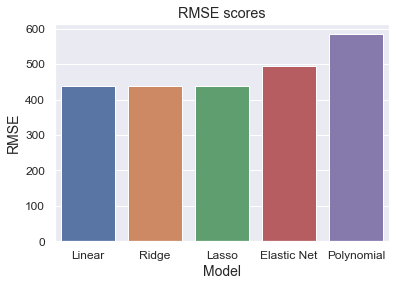

In [92]:
sns.barplot(x='Model', y='RMSE', data=result)
plt.title("RMSE scores")
plt.show()

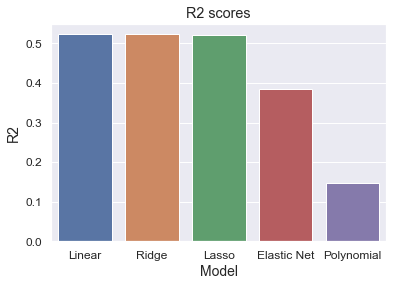

In [93]:
sns.barplot(x='Model', y='R2', data=result)
plt.title("R2 scores")
plt.show()

#### Python code done by Dennis Lam